In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
from data_loaders import model_names
from data_loaders import load_da
from calpycles.enkf_calibration import OBS_IDCS
from calpycles.enkf_calibration import PARAMS
from calpycles.plotting.heatmap import plot_heatmap
import os

In [72]:
model_names = [
    "WENO_FULLRES",
    "WENO_LOWRES",
    # "MIXED_FULLRES",
    "CENTRAL_FULLRES",
    "SYNTH",
]

nice_model_names = {
    "WENO_FULLRES": "WENO FULLRES",
    "WENO_LOWRES": "WENO LOWRES",
    "MIXED_FULLRES": "MIXED FULLRES", # not
    "CENTRAL_FULLRES": "CENTRAL FULLRES",
    "SYNTH": "WENO FULLRES (SYNTHETIC)",
}
### ADD CD MODIFICATION

In [16]:
DA_dict = {
    model_name: load_da(model_name, synthetic=False)
    for model_name in model_names
}

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_LOWRES/DYCOMS_RF01_N64/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64...
... done loading samples for ensemble DYCOMS_RF01_N64.
Loaded observation DYCOMS_RF01_N64 from ./data/WENO_LOWRES/DYCOMS_RF01_N64/samples_observations.nc.
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/MIXED_FULLRE

In [55]:
DA_dict["SYNTH"] = load_da("WENO_FULLRES", synthetic=True)
partial_updates_dict["SYNTH"] = DA_dict["SYNTH"].partial_updates

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [17]:
# plot only part of the observations

mask = OBS_IDCS
obs_names = [DA_dict["WENO_FULLRES"].obs_names[i] for i in mask]

# location
this_path = os.path.abspath("")
folder = os.path.join(this_path,"figs/matrices")

In [61]:
from calpycles.plotting.heatmap import _plot_heatmap
from calpycles.plotting import get_name_mpl
from calpycles.plotting import make_figure
from calpycles.plotting import save_figure

mask = OBS_IDCS
obs_names = [DA_dict["WENO_FULLRES"].obs_names[i] for i in mask]
xlabels = PARAMS.names
ylabels = obs_names
letters = ["a) ", "b) ", "c) ", "d) ", "e) ", "f) ", "g) "]

def plot_matrix(matrix_dict, matrix_name, matrix_label, vmin, vmax):

    fig, axs = make_figure(2,2, ratio=1, fraction=1)

    def _plot_ax(ax, model_name, i, **kwargs):
        matrix = matrix_dict[model_name]
        ax.set_title(letters[i] + nice_model_names[model_name])
        im = _plot_heatmap(
            ax,
            matrix[:,mask],
            vmax=vmax,
            vmin=vmin,
            **kwargs,
        )
        return im 

    _plot_ax(
        ax=axs[0,0],
        model_name="SYNTH",
        i=0,
        xlabels=None,
        ylabels=ylabels,
    )

    _plot_ax(
        ax=axs[0,1],
        model_name="WENO_FULLRES",
        i=1,
        xlabels=None,
        ylabels=None,
    )

    _plot_ax(
        ax=axs[1,0],
        model_name="WENO_LOWRES",
        i=2,
        xlabels=xlabels,
        ylabels=ylabels,
    )

    im = _plot_ax(
        ax=axs[1,1],
        model_name="CENTRAL_FULLRES",
        i=3,
        xlabels=xlabels,
        ylabels=None,
    )

    # colorbar
    cax = fig.add_subplot(3,1,3)
    cax.axis("off")
    cax.grid(False)

    fig.colorbar(
        im,
        ax=cax,
        location="bottom",
        anchor=(0.5, -6),
        shrink=0.5,
        # fraction=0.2,
        pad=0,
        aspect=20,
        extend=None,
        label=matrix_label,
    )

    save_figure(os.path.join(folder, f"fig-{matrix_name}"))

/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/src/calpycles/plotting/__init__.py:210: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


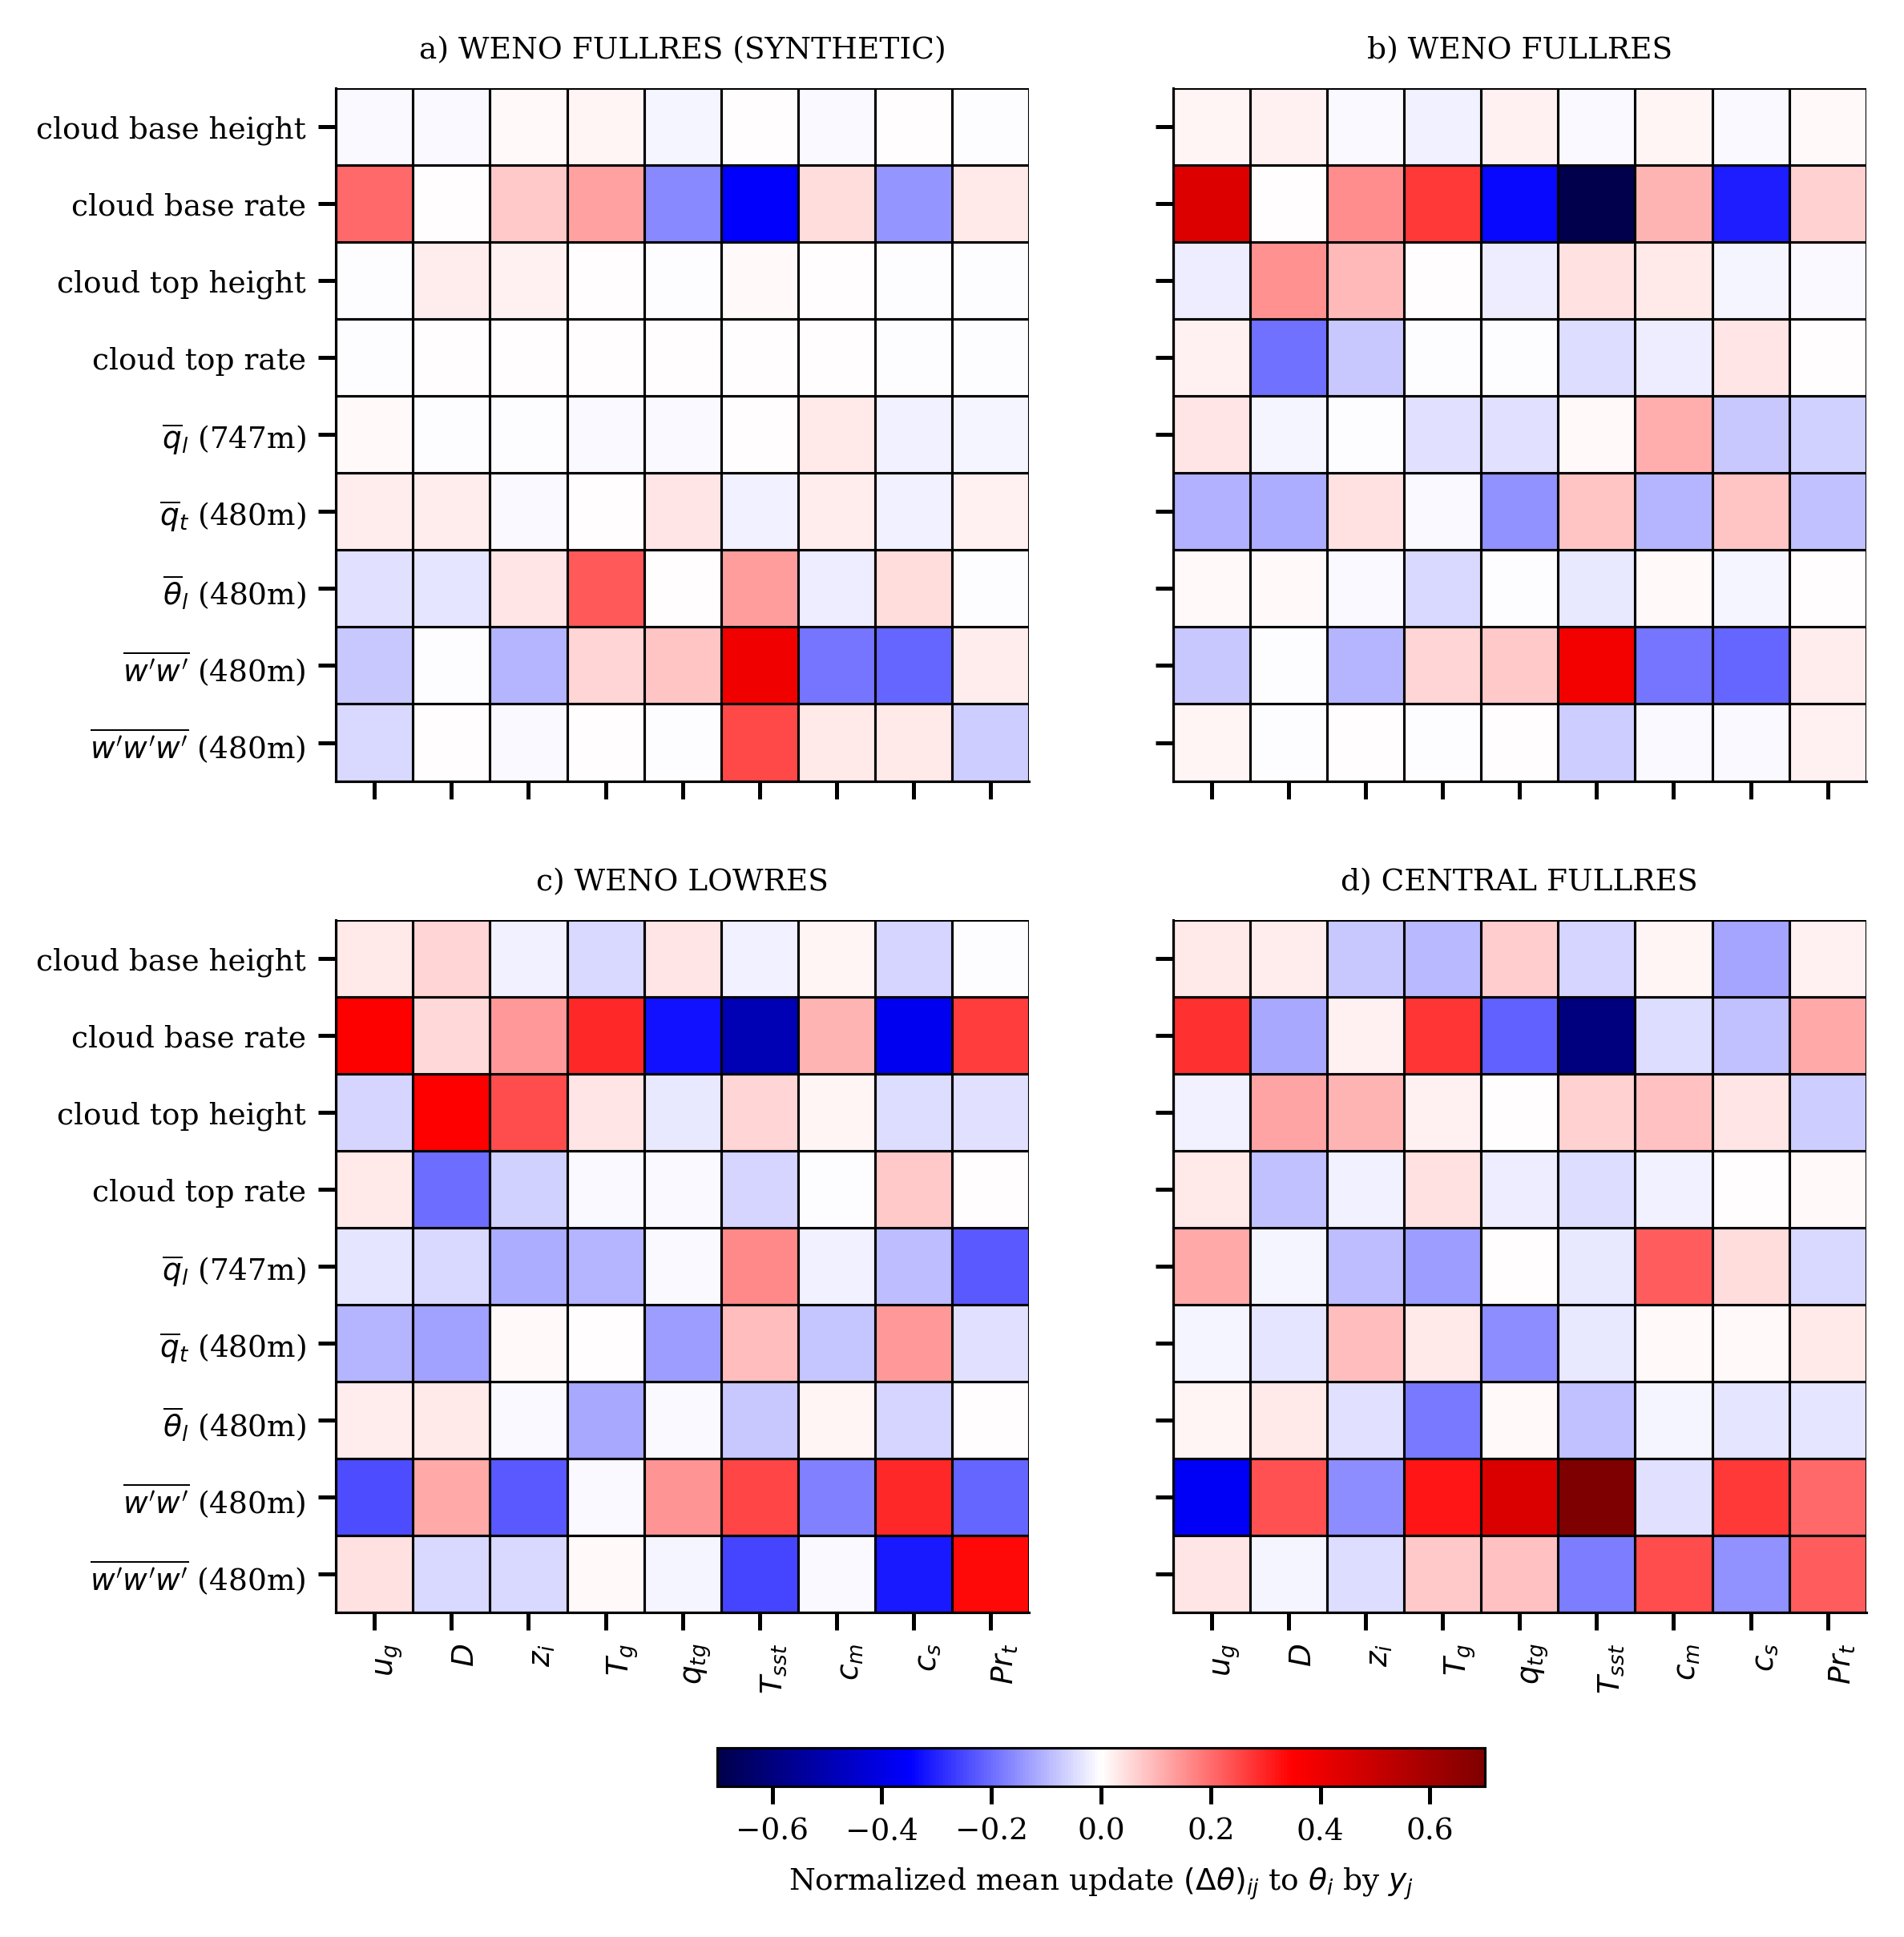

Saved figure  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/figs/matrices/fig-partial_updates


In [60]:
partial_updates_dict = {
    model_name: DA_dict[model_name].partial_updates
    for model_name in model_names
}

plot_matrix(
    matrix_dict = partial_updates_dict,
    matrix_name = "partial_updates",
    matrix_label = r"Normalized mean update $(\Delta\theta)_{ij}$ to $\theta_i$ by $y_j$",
    vmax = 0.7,
    vmin = -0.7,
)

/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/src/calpycles/plotting/__init__.py:210: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


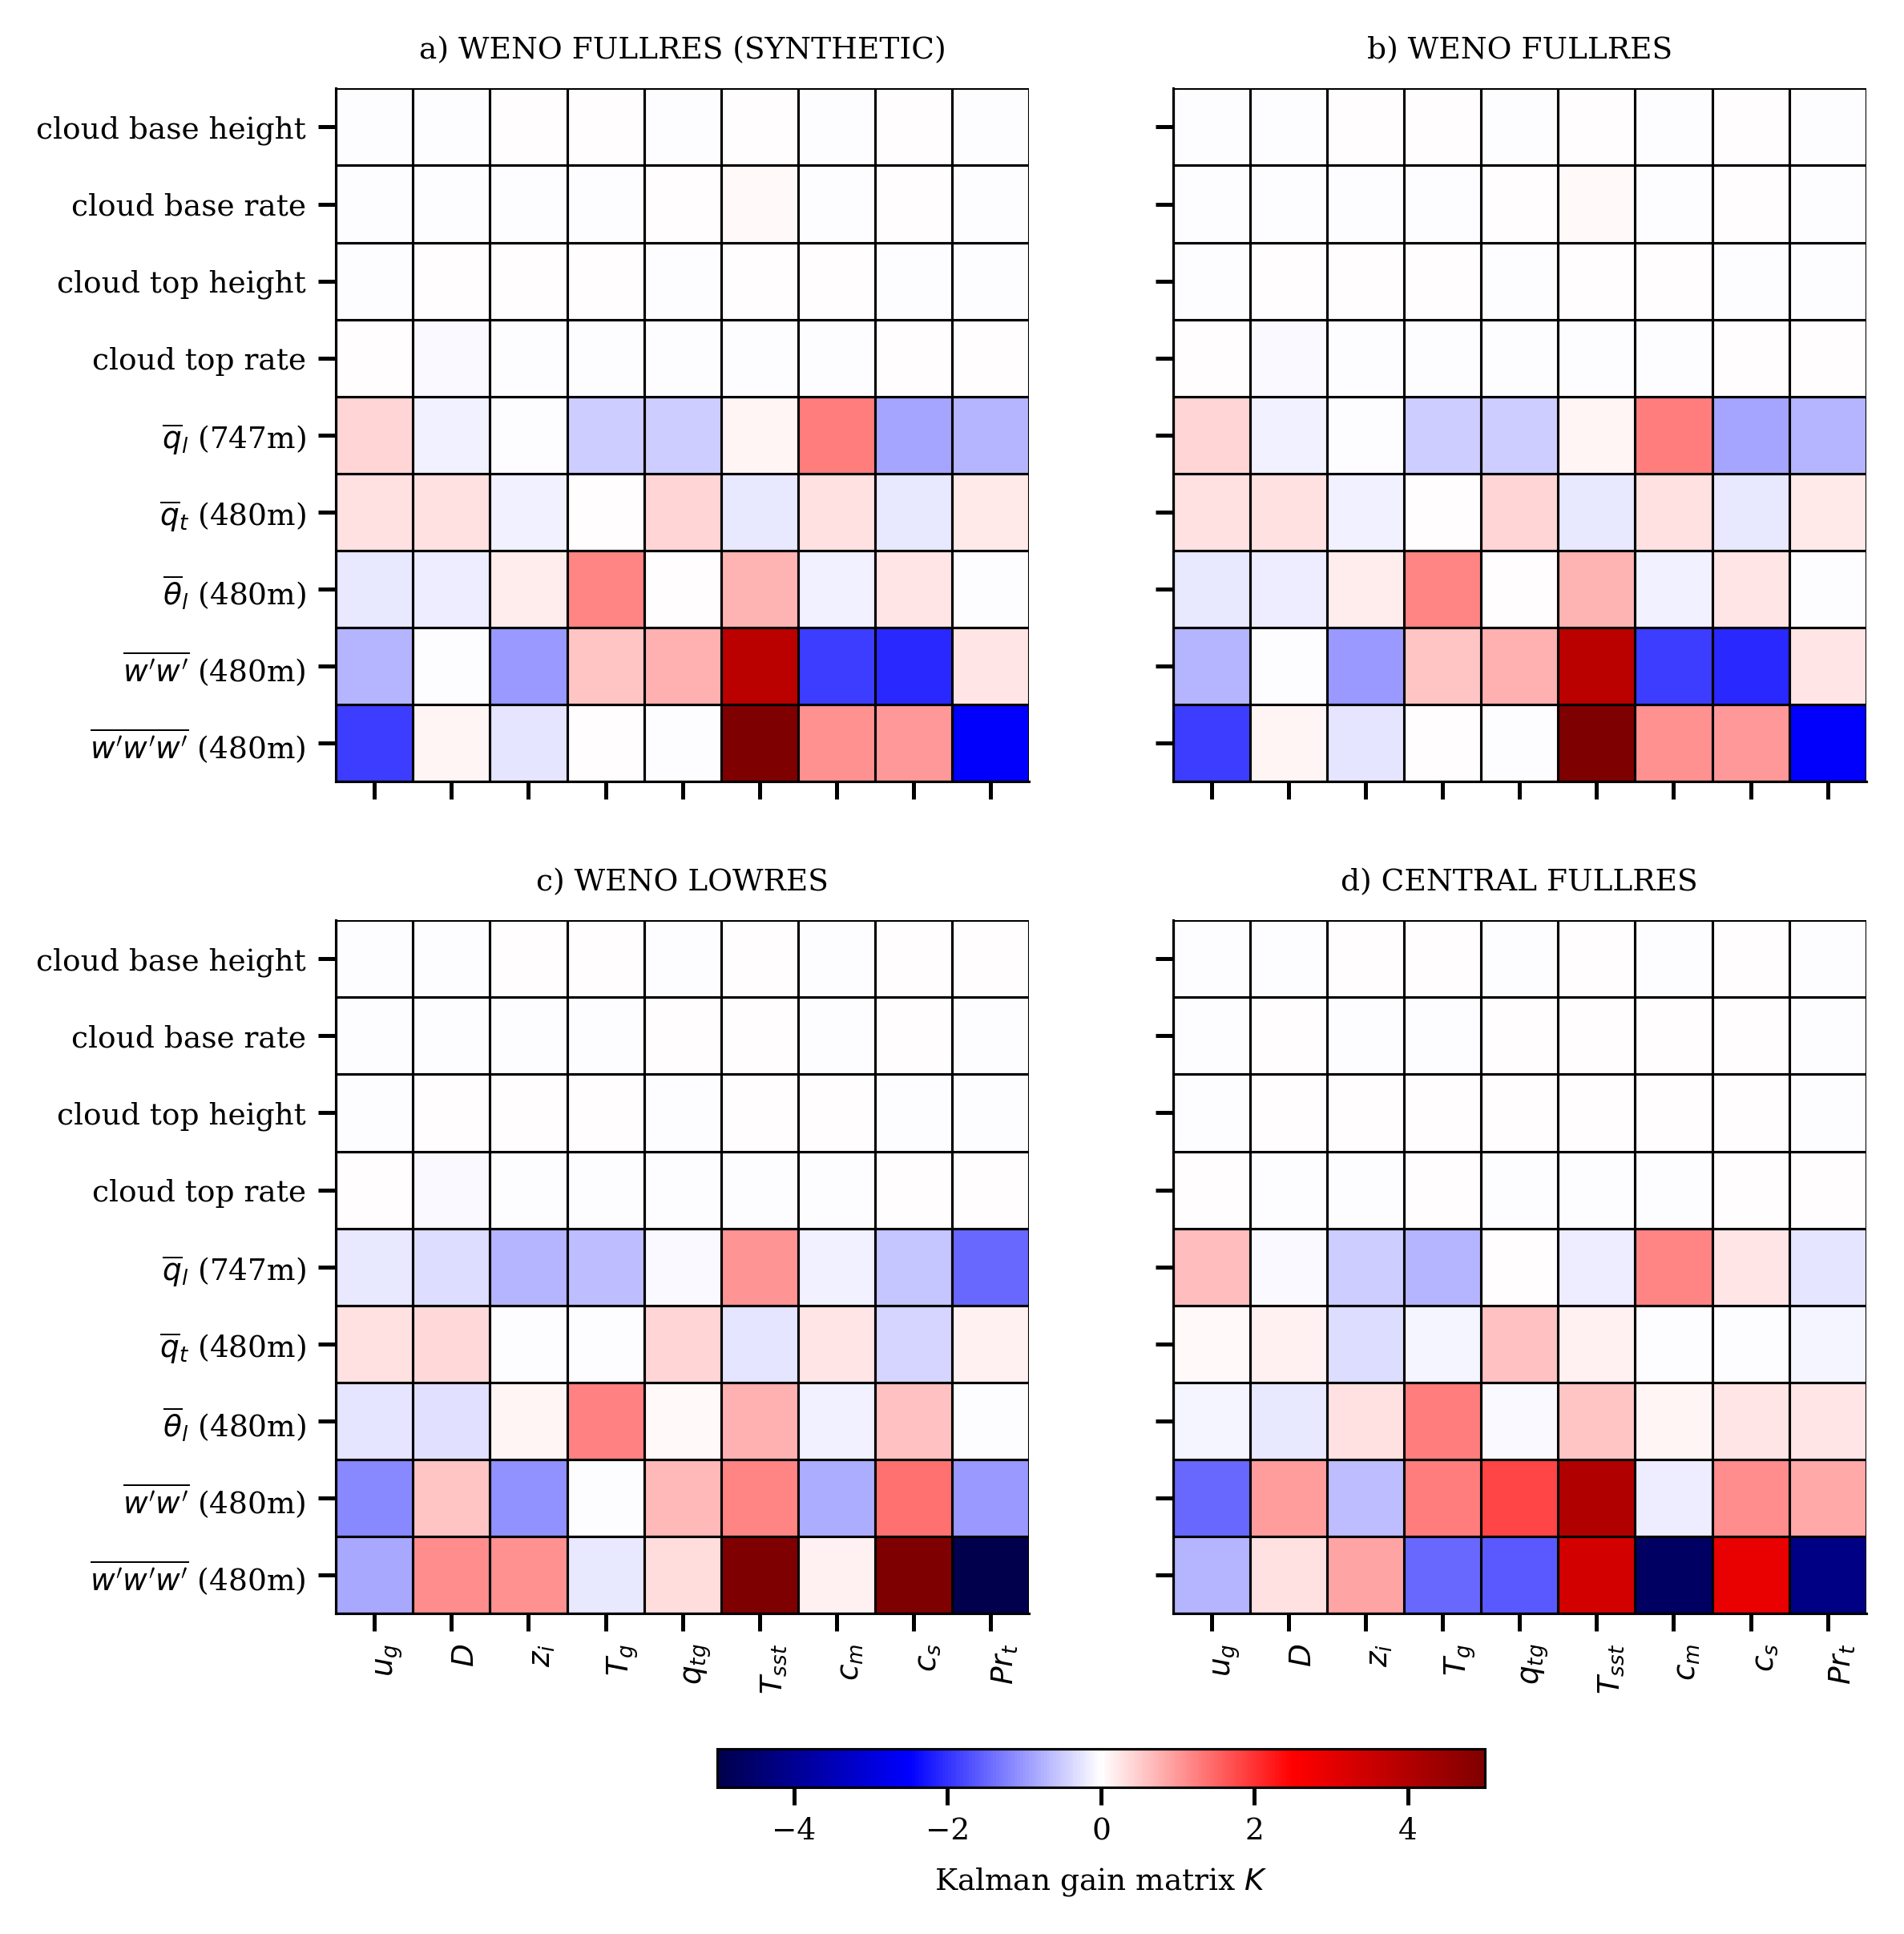

Saved figure  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/figs/matrices/fig-K


In [73]:
KG_dict = {
    model_name: DA_dict[model_name].KG
    for model_name in model_names
}

plot_matrix(
    matrix_dict = KG_dict,
    matrix_name = "K",
    matrix_label = r"Kalman gain matrix $K$",
    vmax = 5,
    vmin = -5,
)

/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/src/calpycles/plotting/__init__.py:210: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


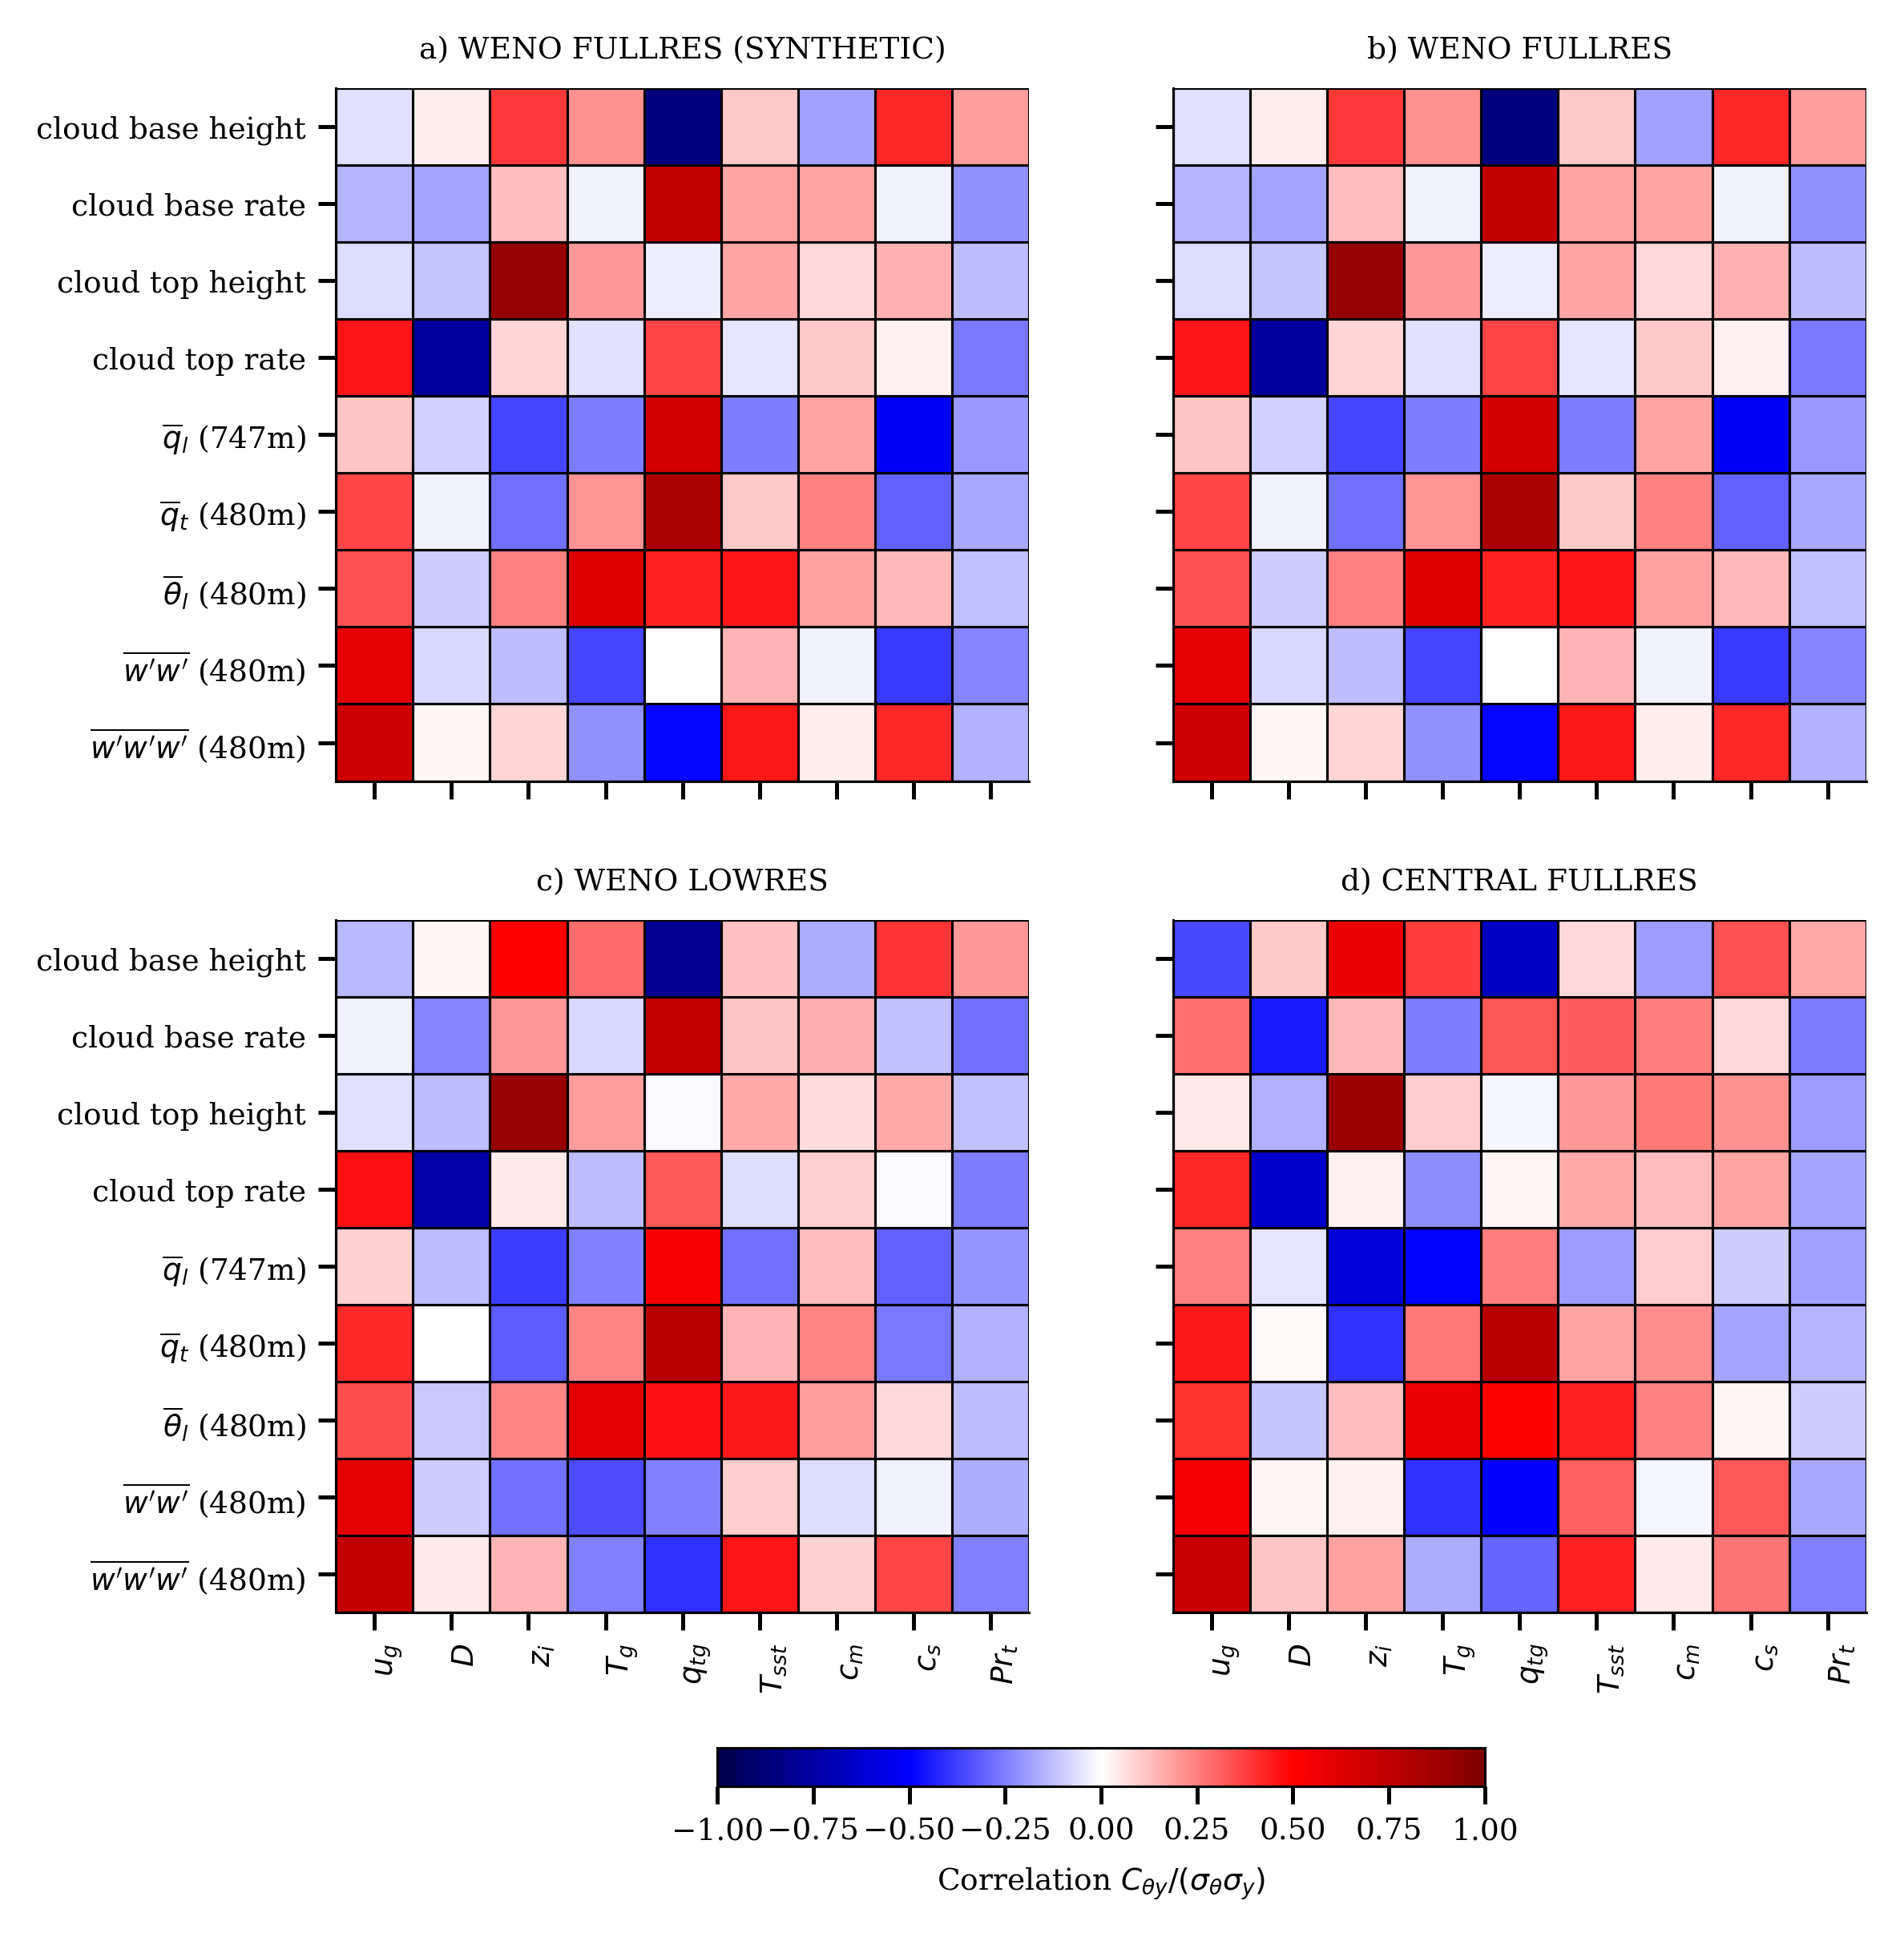

Saved figure  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/figs/matrices/fig-Corr_XY


In [74]:
Corr_XY_dict = {
    model_name: DA_dict[model_name].Corr_XY
    for model_name in model_names
}

plot_matrix(
    matrix_dict = Corr_XY_dict,
    matrix_name = "Corr_XY",
    matrix_label = r"Correlation $C_{\theta y}/(\sigma_\theta \sigma_y)$",
    vmax = 1,
    vmin = -1,
)

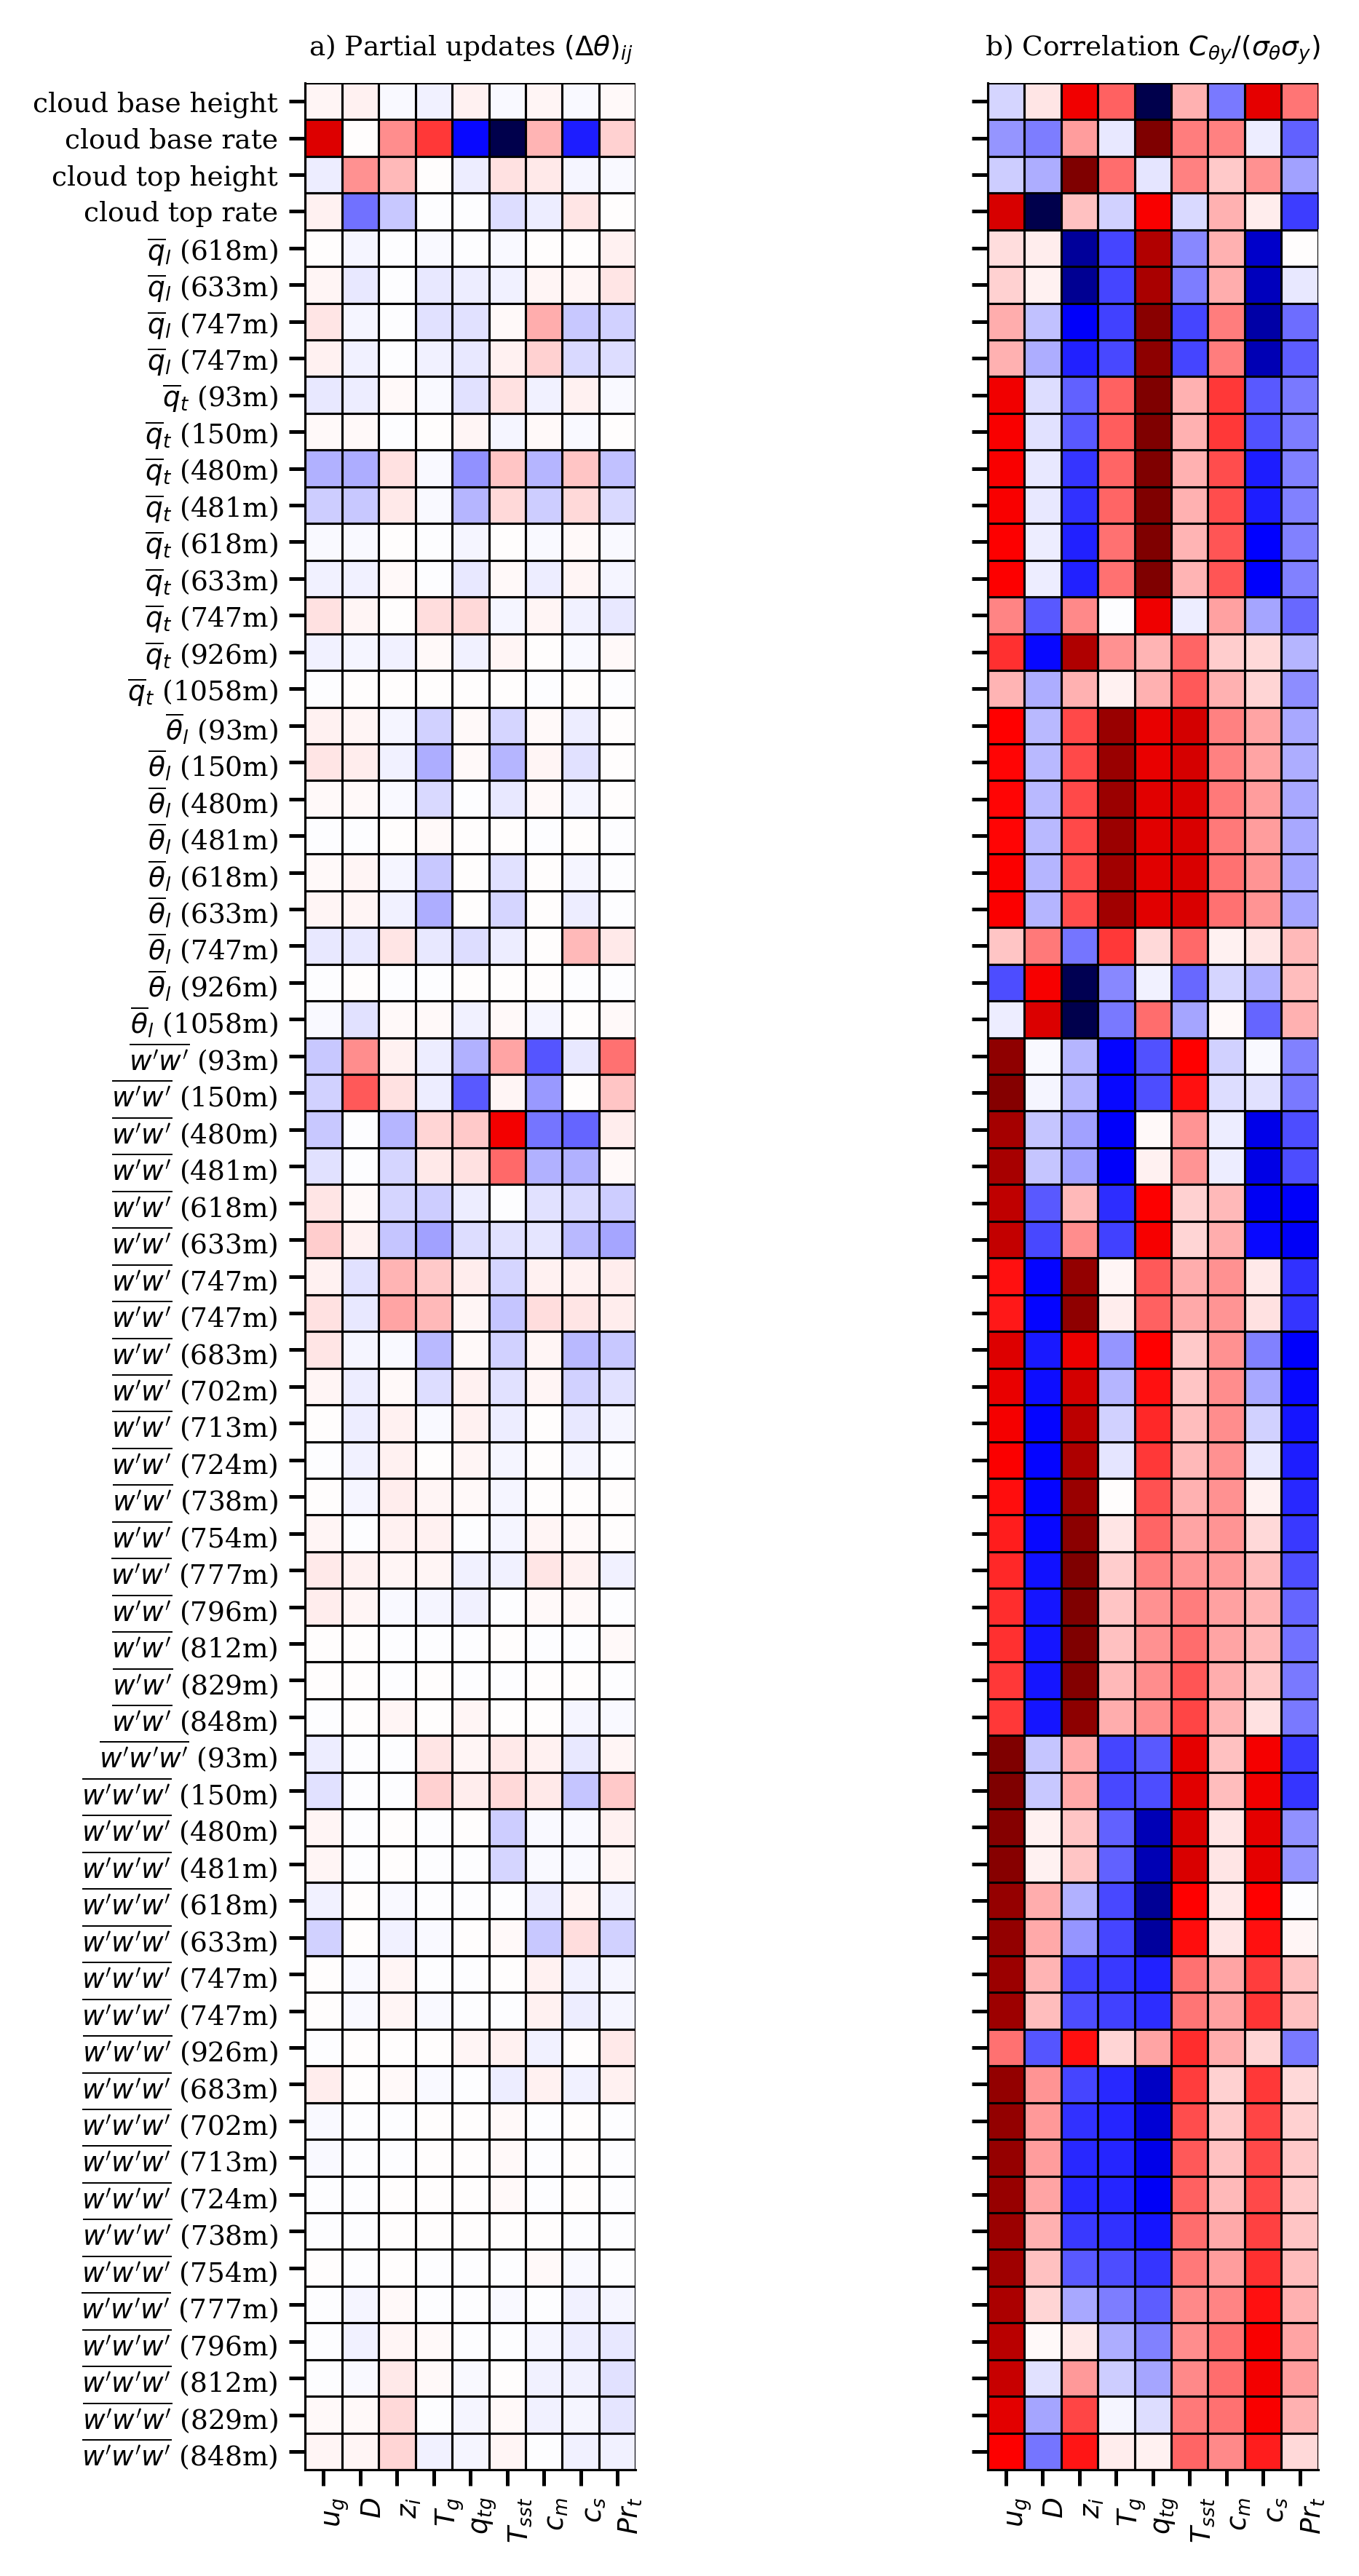

Saved figure  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/figs/matrices/fig-matrices_full_WENO_FULLRES


In [91]:
### plot full matrices

from calpycles.plotting.heatmap import _plot_heatmap
from calpycles.plotting import get_name_mpl
from calpycles.plotting import make_figure
from calpycles.plotting import save_figure

model_name = "WENO_FULLRES"
DA = DA_dict[model_name]
xlabels = PARAMS.names
ylabels = DA_dict[model_name].obs_names
letters = ["a) ", "b) ", "c) ", "d) ", "e) ", "f) ", "g) "]


# def plot_matrix(matrix_dict, matrix_name, matrix_label, vmin, vmax):

fig, axs = make_figure(2,1, ratio=0.35, fraction=1)

def _plot_ax_full(ax, matrix, title, i, **kwargs):
    ax.set_title(letters[i] + title)
    im = _plot_heatmap(
        ax,
        matrix,
        **kwargs,
    )
    return im 

_plot_ax_full(
    ax=axs[0],
    matrix=DA.partial_updates,
    title=r"Partial updates $(\Delta\theta)_{ij}$",
    i=0,
    xlabels=xlabels,
    ylabels=ylabels,
    vmax=0.7,
    vmin=-0.7,
)

_plot_ax_full(
    ax=axs[1],
    matrix=DA.Corr_XY,
    title=r"Correlation $C_{\theta y}/(\sigma_\theta \sigma_y)$",
    i=1,
    xlabels=xlabels,
    ylabels=None,
    vmax=0.7,
    vmin=-0.7,
)

# # colorbar
# cax = fig.add_subplot(3,1,3)
# cax.axis("off")
# cax.grid(False)

# fig.colorbar(
#     im,
#     ax=cax,
#     location="bottom",
#     anchor=(0.5, -6),
#     shrink=0.5,
#     # fraction=0.2,
#     pad=0,
#     aspect=20,
#     extend=None,
#     label=matrix_label,
# )

save_figure(os.path.join(folder, f"fig-matrices_full_WENO_FULLRES"))